# Analyzing the behavior before selecting pictures

In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:

headers = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']
data_f = pd.read_csv('final_data.csv', sep=',', skiprows = 1, header=None, names=headers, dtype={"col1": int, "col2": float, "col3": object, "col4": object, "col5": float, "col6": float, "col7": object, "col8": object, "col9": object, "col10": object})
data = data_f.to_numpy()
print(data)

[[0 333603557.0 '1146.1' ... nan nan nan]
 [1 333603557.0 '1145.8' ... nan nan nan]
 [2 333603558.0 '1145.8' ... nan nan nan]
 ...
 [744956 333976193.0 '1234.4' ... '917' nan nan]
 [744957 333976193.0 '1234.1' ... '917' nan nan]
 [744958 333976194.0 '1233.8' ... nan nan nan]]


## output format
- trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
- time: 1s = 2000 lines, 0.2s = 400, 0.4s = 800, 0.6s = 1200, 0.8s = 1600. Thus, 1 line = 1/2000s

In [7]:
output = np.empty((20, 16), dtype=object)
output[:] = ""


In [8]:
df_header = pd.read_csv('J_day11_J030701_TOJ_pic_trainning_step_3_2023-03-07_09h40.44.728_result.csv')
print(df_header)

    Unnamed: 0.1  Unnamed: 0  total_loop_times  fc_loop_times  cross_size   
0              0           0                 5              1          75  \
1              1           1                 5              1          75   
2              2           2                 5              1          75   
3              3           3                 5              1          75   
4              4           4                 5              1          75   
5              5           5                 5              1          75   
6              6           6                 5              1          75   
7              7           7                 5              1          75   
8              8           8                 5              1          75   
9              9           9                 5              1          75   
10            10          10                 5              1          75   
11            11          11                 5              1          75   

In [9]:
print(df_header['pic_chosen'])
print(df_header['pic_chosen_position'].to_numpy().shape)

0      F:\Pic_TOJ\pic_pool_step_3_formal\782_1.png
1     F:\Pic_TOJ\pic_pool_step_3_formal\1065_1.png
2      F:\Pic_TOJ\pic_pool_step_3_formal\682_1.png
3      F:\Pic_TOJ\pic_pool_step_3_formal\770_3.png
4      F:\Pic_TOJ\pic_pool_step_3_formal\782_3.png
5     F:\Pic_TOJ\pic_pool_step_3_formal\1065_2.png
6      F:\Pic_TOJ\pic_pool_step_3_formal\770_2.png
7      F:\Pic_TOJ\pic_pool_step_3_formal\682_3.png
8     F:\Pic_TOJ\pic_pool_step_3_formal\1065_3.png
9      F:\Pic_TOJ\pic_pool_step_3_formal\782_3.png
10     F:\Pic_TOJ\pic_pool_step_3_formal\770_2.png
11     F:\Pic_TOJ\pic_pool_step_3_formal\682_1.png
12     F:\Pic_TOJ\pic_pool_step_3_formal\682_2.png
13     F:\Pic_TOJ\pic_pool_step_3_formal\770_3.png
14     F:\Pic_TOJ\pic_pool_step_3_formal\782_3.png
15    F:\Pic_TOJ\pic_pool_step_3_formal\1065_2.png
16    F:\Pic_TOJ\pic_pool_step_3_formal\1065_2.png
17     F:\Pic_TOJ\pic_pool_step_3_formal\770_3.png
18     F:\Pic_TOJ\pic_pool_step_3_formal\782_2.png
19     F:\Pic_TOJ\pic_pool_step

In [38]:
def in_08(i, end_data_index):
    if (end_data_index - i) / 2000 <= 0.8:
        return True
    return False


def in_06(i, end_data_index):
    if (end_data_index - i) / 2000 <= 0.6:
        return True
    return False


def in_04(i, end_data_index):
    if (end_data_index - i) / 2000 <= 0.4:
        return True
    return False


def in_02(i, end_data_index):
    if (end_data_index - i) / 2000 <= 0.2:
        return True
    return False


def cal_response_time(start_data_index, end_data_index, data):
    response_time = (data[end_data_index - 2000][0] - data[start_data_index][0]) / 2000
    return response_time


def cal_time_on_pic(chosen_pic, start_data_index, end_data_index, data):
    num_chosen_pic = 0
    num_chosen_pic_08 = 0
    num_chosen_pic_06 = 0
    num_chosen_pic_04 = 0
    num_chosen_pic_02 = 0
    num_others = 0
    total_num = end_data_index - start_data_index
    for i in range(start_data_index, end_data_index):
        if data[i][-1] == chosen_pic:
            num_chosen_pic += 1
            if in_08(i, end_data_index):
                num_chosen_pic_08 += 1
            if in_06(i, end_data_index):
                num_chosen_pic_06 += 1
            if in_04(i, end_data_index):
                num_chosen_pic_04 += 1
            if in_02(i, end_data_index):
                num_chosen_pic_02 += 1
        else:
            num_others += 1
    
    time_on_pic = num_chosen_pic / 2000
    time_on_pic_08 = num_chosen_pic_08 / 2000
    time_on_pic_06 = num_chosen_pic_06 / 2000
    time_on_pic_04 = num_chosen_pic_04 / 2000
    time_on_pic_02 = num_chosen_pic_02 / 2000
    return time_on_pic, time_on_pic_02, time_on_pic_04, time_on_pic_06, time_on_pic_08


def cal_prop_on_pic(segment_time, total_response_time): #segment_time (5,)
    prop = segment_time[0] / total_response_time
    prop_02 = segment_time[1] / 0.2
    prop_04 = segment_time[2] / 0.4
    prop_06 = segment_time[3] / 0.6
    prop_08 = segment_time[4] / 0.8
    return prop, prop_02, prop_04, prop_06, prop_08 


In [39]:
trial_index = 0
current_data_index = 0
# 0:5 trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, 
# 6:10 time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, 
# 11:15 percent_on_pic_trial, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8

try:
    while current_data_index < np.shape(data)[0] and trial_index < 20:
        if current_data_index % 100000 == 0:
            print("track", current_data_index)
        if data[current_data_index][-2] is np.nan:
            current_data_index += 1
        elif 'forcedchoice_start' in data[current_data_index][-2]:
            output[trial_index][0] = trial_index
            output[trial_index][1] = data[current_data_index][1]
            start_data_index = current_data_index
            while not data[current_data_index][-2] is np.nan and 'forcedchoice_start' in data[current_data_index][-2]:
                current_data_index += 1
            end_data_index = current_data_index
            print("trial end at", end_data_index)
            output[trial_index][2] = data[end_data_index - 1][1]
            output[trial_index][3] = cal_response_time(start_data_index, end_data_index, data)
            output[trial_index][4] = df_header['pic_chosen_position'][trial_index]
            output[trial_index][5] = df_header['response'][trial_index]
            chosen_pic = df_header['pic_chosen'][trial_index]
            output[trial_index][6], output[trial_index][7], output[trial_index][8], output[trial_index][9], output[trial_index][10] = cal_time_on_pic(chosen_pic, start_data_index, end_data_index - 2000, data)
            output[trial_index][11], output[trial_index][12], output[trial_index][13], output[trial_index][14], output[trial_index][15] = cal_prop_on_pic(output[trial_index][6:11], output[trial_index][3])
            trial_index += 1
        elif 'forcedmemory_start' in data[current_data_index][-2]:
            current_data_index += 1
        else:
            print("error occurs in line", current_data_index)
            raise(ValueError) 
except ValueError:
    print("???")

track 0
trial end at 63992
trial end at 86268
trial end at 100926
trial end at 135214
track 200000
trial end at 209025
trial end at 236195
trial end at 261461
trial end at 286781
track 300000
trial end at 365254
trial end at 390204
track 400000
trial end at 418064
trial end at 443302
track 500000
trial end at 525981
trial end at 548653
trial end at 565375
trial end at 589767
track 600000
trial end at 674274
trial end at 701842
trial end at 718642
trial end at 733800


In [40]:
output

array([[0, 333634239.0, 333635552.0, 0.314, 'left', 0, 0.125, 0.125,
        0.125, 0.125, 0.125, 0.3980891719745223, 0.625, 0.3125,
        0.20833333333333334, 0.15625],
       [1, 333645281.0, 333646690.0, 0.41, 'bottom', 1, 0.181, 0.181,
        0.181, 0.181, 0.181, 0.44146341463414634, 0.9049999999999999,
        0.45249999999999996, 0.3016666666666667, 0.22624999999999998],
       [2, 333652453.0, 333654019.0, 0.567, 'bottom', 0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [3, 333664030.0, 333671163.0, 6.134, 'right', 1, 0.446, 0.181,
        0.37, 0.37, 0.37, 0.07270948809911966, 0.9049999999999999,
        0.9249999999999999, 0.6166666666666667, 0.46249999999999997],
       [4, 333706886.0, 333708110.0, 0.225, 'left', 0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [5, 333717383.0, 333721695.0, 3.313, 'bottom', 0, 1.424, 0.174,
        0.374, 0.574, 0.774, 0.4298219136734077, 0.8699999999999999,
        0.9349999999999999, 0.9566666666

In [45]:
# 0:5 trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, 
# 6:10 time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, 
# 11:15 percent_on_pic_trial, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
correct_response_time = []
incorrect_response_time = []
target_valid = []
target_valid_08 = []
target_valid_06 = []
target_valid_04 = []
target_valid_02 = []
foil_valid = []
foil_valid_08 = []
foil_valid_06 = []
foil_valid_04 = []
foil_valid_02 = []

for record in output:
    if record[-1] == 0:
        continue
    if record[5] == 1:
        correct_response_time.append(record[3])
        target_valid.append(record[11])
        if record[3] >= 0.2:
            target_valid_02.append(record[12])
        if record[3] >= 0.4:
            target_valid_04.append(record[13])
        if record[3] >= 0.6:
            target_valid_06.append(record[14])
        if record[3] >= 0.8:
            target_valid_08.append(record[15])
    elif record[5] == 0:
        incorrect_response_time.append(record[3])
        foil_valid.append(record[11])
        if record[3] >= 0.2:
            foil_valid_02.append(record[12])
        if record[3] >= 0.4:
            foil_valid_04.append(record[13])
        if record[3] >= 0.6:
            foil_valid_06.append(record[14])
        if record[3] >= 0.8:
            foil_valid_08.append(record[15])



In [67]:
foil_valid

[0.3980891719745223,
 0.4298219136734077,
 0.452078032230704,
 0.004835589941972921,
 0.02380952380952381,
 0.7177722152690863]

[0.9675, 0.819375, 0.0062499999999999995, 0.9725]


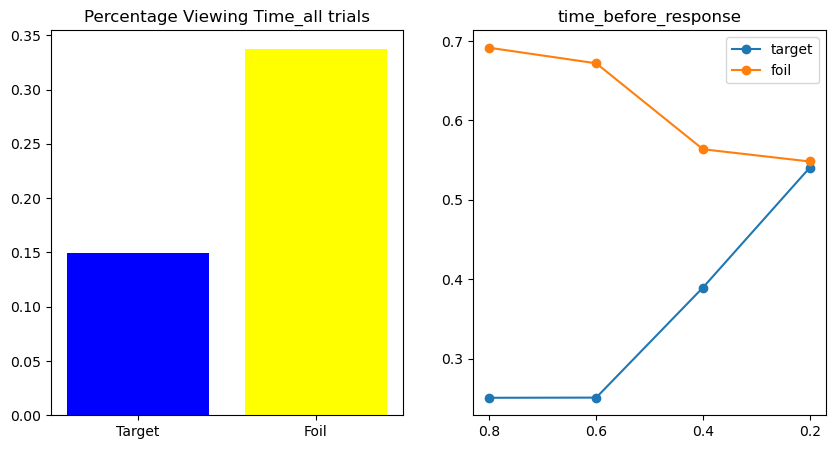

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Percentage Viewing Time_all trials')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
plt.bar(['Target','Foil'], [np.mean(target_valid), np.mean(foil_valid)],color=['blue','yellow'], width=0.8)

plt.subplot(1,2,2)
plt.title('time_before_response')
x_axis = ["0.8", "0.6", "0.4", "0.2"]
mean_values_target = [np.mean(target_valid_08), np.mean(target_valid_06), np.mean(target_valid_04), np.mean(target_valid_02)]
mean_values_foil = [np.mean(foil_valid_08), np.mean(foil_valid_06), np.mean(foil_valid_04), np.mean(foil_valid_02)]
print(foil_valid_08)
plt.plot(x_axis, mean_values_target, marker='o', label='target')
# Plot the second line
plt.plot(x_axis, mean_values_foil, marker='o', label='foil')

plt.legend()